<a href="https://colab.research.google.com/github/Sedhuraman99/chennai_price_prdctn/blob/main/chennai_houseprice_prdctn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [15]:
df = pd.read_csv('/content/Chennai houseing sale.csv')
pd.set_option('display.max_columns' ,None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [17]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['N_BEDROOM']=imputer.fit_transform(df[['N_BEDROOM']])
df['N_BATHROOM']=imputer.fit_transform(df[['N_BATHROOM']])
df['QS_OVERALL']=imputer.fit_transform(df[['QS_OVERALL']])

In [19]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [20]:
df.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df.AREA.replace('Karapakkam','Karapakam',inplace=True)
df.AREA.replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace=True)
df.AREA.replace('KKNagar','KK Nagar',inplace=True)
df.AREA.replace('TNagar','T Nagar',inplace=True)
df.AREA.replace('Adyr','Adyar',inplace=True)
df.AREA.replace('Velchery','Velachery',inplace=True)
df.BUILDTYPE.replace('Comercial','Commercial',inplace=True)
df.BUILDTYPE.replace('Other','Others',inplace=True)
df.UTILITY_AVAIL.replace('AllPub','All Pub',inplace=True)
df.UTILITY_AVAIL.replace('NoSewr','NoSeWa',inplace=True)
df.SALE_COND.replace('Ab Normal','AbNormal',inplace=True)
df.SALE_COND.replace(['PartiaLl','Partiall'],'Partial',inplace=True)
df.SALE_COND.replace('Adj Land','AdjLand',inplace=True)
df.PARK_FACIL.replace('Noo','No',inplace=True)
df.STREET.replace('Pavd','Paved',inplace=True)
df.STREET.replace('NoAccess','No Access',inplace=True)

In [21]:
df.QS_ROOMS=df.QS_ROOMS.astype(int)
df.QS_BATHROOM=df.QS_BATHROOM.astype(int)
df.QS_BEDROOM=df.QS_BEDROOM.astype(int)
df.N_BEDROOM=df.N_BEDROOM.astype(int)
df.N_BATHROOM=df.N_BATHROOM.astype(int)

In [22]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,15-05-1967,Commercial,All Pub,Paved,A,4,3,4,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,22-12-1995,Commercial,All Pub,Gravel,RH,4,4,2,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1,1,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4,3,2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3,2,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4,3,3,4.010,356321,77042,9630290
4,P06210,Karapakam,1226,05-10-2009,84,1,1,3,AbNormal,Yes,13-10-1979,Others,All Pub,Gravel,C,3,2,4,3.290,237000,74063,7406250


In [23]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.075538,3.069349,3.056126,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.872937,0.876024,0.871499,0.525440,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.503254,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.880000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [24]:
df.AREA.value_counts()

Chrompet      1702
Karapakam     1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [25]:
px.pie(df.groupby('AREA',as_index=False)['PRT_ID'].count(),values='PRT_ID',names='AREA',labels={'PRT_ID':'Count'}
       ,template='plotly_dark',color_discrete_sequence=px.colors.sequential.Plasma,hole=.5,title='<b> House Count in different Areas of Chennai')

In [26]:
px.box(df,x='AREA',y='SALES_PRICE',color='AREA',template='plotly_dark',title='<b> Sales Price of Houses in different Areas')

In [27]:
px.scatter(df,x='INT_SQFT',y='SALES_PRICE',color='AREA',size='INT_SQFT',labels={'INT_SQFT':'SQFT'}
           ,template='plotly_dark',title='<b> SQFT Versus SALES PRICE of Houses in Different Areas')

In [28]:
px.scatter(df,x='DIST_MAINROAD',y='SALES_PRICE',color='AREA',size='SALES_PRICE',template='plotly_dark',title='<b> MAINROAD DISTANCE Vs SALES_PRICE')

In [ ]:
df.corr()['SALES_PRICE']

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330987
N_BATHROOM       0.108834
N_ROOM           0.602760
QS_ROOMS         0.016059
QS_BATHROOM     -0.019469
QS_BEDROOM       0.015044
QS_OVERALL       0.020485
REG_FEE          0.878148
COMMIS           0.626275
SALES_PRICE      1.000000
Name: SALES_PRICE, dtype: float64

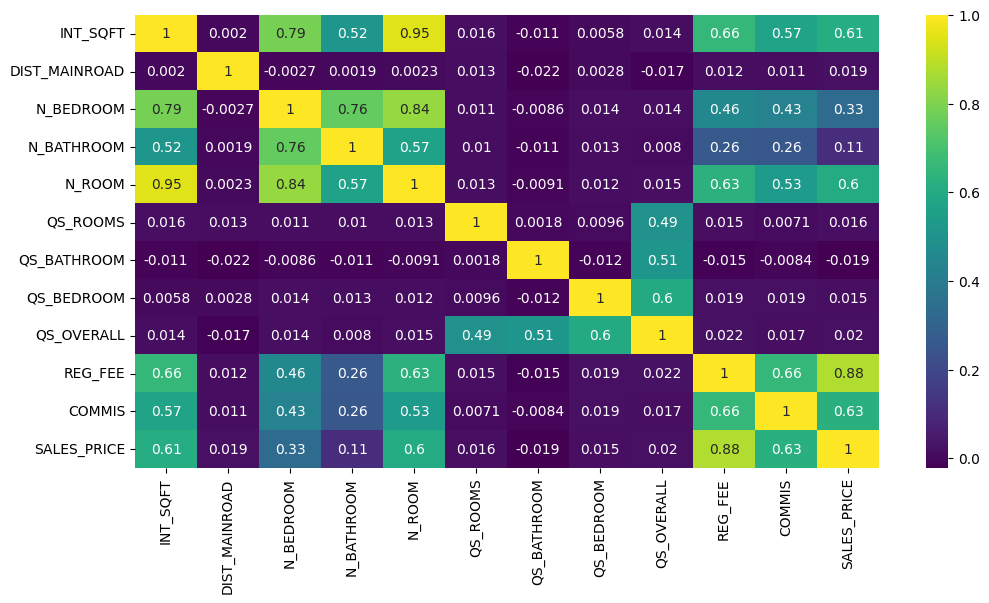

In [ ]:
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(df.corr(),annot=True,cmap='viridis');

In [ ]:
df_bk=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df['BUILDTYPE'] = df['BUILDTYPE'].map({'Others':0,'Commercial':1,'House':2})

In [32]:
df["AREA"] = df["AREA"].map({'Karapakam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [34]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,2266,0,1004,310,131,1,1,3,0,1,2731,0,0,2,0,4,3,4,4.330,380000,144400,7600000
1,6664,5,1986,1745,26,2,1,5,0,0,4226,0,0,0,3,4,4,2,3.765,760122,304049,21717770
2,1270,1,909,288,70,1,1,3,0,1,1511,0,1,0,4,4,3,2,3.090,421094,92114,13159200
3,3755,3,1855,1117,14,3,2,5,2,0,3300,2,3,2,2,4,3,3,4.010,356321,77042,9630290
4,4393,0,1226,442,84,1,1,3,0,1,2406,2,0,0,1,3,2,4,3.290,237000,74063,7406250


In [35]:
x = df.drop('SALES_PRICE',axis=1)
y = df['SALES_PRICE']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [37]:
x_vd, x_ht, y_vd, y_ht = train_test_split(x_test, y_test, test_size=0.5, random_state=8)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_vd = scaler.transform(x_vd)
x_ht = scaler.transform(x_ht)

In [39]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'alpha':[200,210,47000],'l1_ratio':[.99,1,2,3]}

In [42]:
LR_grid_model = GridSearchCV(estimator=elastic_model,param_grid=param_grid,scoring='neg_mean_absolute_error',cv=5,verbose=1)

In [43]:
LR_grid_model.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [200, 210, 47000],
                         'l1_ratio': [0.99, 1, 2, 3]},
             scoring='neg_mean_absolute_error', verbose=1)

In [44]:
LR_grid_model.best_estimator_

ElasticNet(alpha=210, l1_ratio=1)

In [45]:
LR_grid_model.best_params_

{'alpha': 210, 'l1_ratio': 1}

In [46]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [47]:
operations = [('scaler',scaler),('knn',knn)]

In [48]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
k_values = list(range(1,20))

In [51]:
param_grid = {'knn__n_neighbors':k_values}

In [52]:
KNN_grid_model = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [53]:
KNN_grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [54]:
KNN_grid_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsRegressor(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [57]:
from sklearn.svm import SVR
svr_model = SVR()

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grid = {'C':[10],'kernel':['linear'],'gamma':['auto'],'degree':[1],'epsilon':[1]}

In [60]:
SVR_grid_model = GridSearchCV(svr_model,param_grid)

In [61]:
SVR_grid_model.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10], 'degree': [1], 'epsilon': [1],
                         'gamma': ['auto'], 'kernel': ['linear']})

In [62]:
SVR_grid_model.best_params_

{'C': 10, 'degree': 1, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {'n_estimators':[64,130,100],'max_features':['sqrt'],'max_depth':[4]}

In [66]:
RFR_grid_model = GridSearchCV(rfr_model,param_grid)

In [67]:
RFR_grid_model.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4], 'max_features': ['sqrt'],
                         'n_estimators': [64, 130, 100]})

In [68]:
RFR_grid_model.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 130}

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
param_grid = {'n_estimators':[50,100,150],'learning_rate':[0.05,0.1,0.2],'max_depth':[2,3,4]}

In [72]:
GB_grid_model = GridSearchCV(gb_model,param_grid)

In [73]:
GB_grid_model.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]})

In [74]:
GB_grid_model.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}

In [75]:
import xgboost as xgb

In [76]:
modelXGR = xgb.XGBRegressor()

In [ ]:
modelXGR.fit(x_train,y_train)

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [79]:
def report(model):
    preds = model.predict(x_vd)
    print(mean_absolute_error(y_vd,preds))
    print(mean_squared_error(y_vd,preds))
    print(r2_score(y_vd,preds))

In [80]:
print("linear_model")
report(LR_grid_model)

linear_model
1001909.6902018079
1614705948930.474
0.884578086216352


In [81]:
print("KNN_model")
report(KNN_grid_model)

KNN_model
1422791.3508442778
3832337323805.816
0.7260580426602384


In [82]:
print("SVMR_model")
report(SVR_grid_model)

SVMR_model
2812155.715870451
13339207855954.158
0.046490848620516


In [83]:
print("randomforest_model")
report(RFR_grid_model)

randomforest_model
1032950.7955983754
1730674691889.3174
0.8762884442166681


In [84]:
print("gradientboosting_model")
report(GB_grid_model)

gradientboosting_model
287626.11500334484
132081263748.98857
0.990558607747145


In [85]:
print("XGR_model")
report(modelXGR)

XGR_model
468743.7607879925
343480479966.90045
0.9754474340226682


In [86]:
y_pred = GB_grid_model.predict(x_ht)

In [87]:
print(mean_absolute_error(y_ht,y_pred))
print(mean_squared_error(y_ht,y_pred))
print(r2_score(y_ht,y_pred))

280847.5253847698
123901872646.69595
0.9911267916060409
